In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error
from sklearn.preprocessing iamport LabelEncoder

In [2]:
# Load the training and testing datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
# Drop the 'Id' column from the training data, and store the 'Id' column of test data separately
train_data = train_data.drop('Id', axis=1)
test_ids = test_data['Id']
test_data = test_data.drop('Id', axis=1)

In [4]:
# Handle missing values in training data
# For categorical columns, replace missing values with the mode
# For numerical columns, replace missing values with the median
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = train_data[col].fillna(train_data[col].mode()[0])
    else:
        train_data[col] = train_data[col].fillna(train_data[col].median())

# Handle missing values in test data using the same logic as training data
for col in test_data.columns:
    if test_data[col].dtype == 'object':
        test_data[col] = test_data[col].fillna(test_data[col].mode()[0])
    else:
        test_data[col] = test_data[col].fillna(test_data[col].median())


In [5]:
# Encode categorical variables using Label Encoding
label_encoders = {}
for col in train_data.columns:
    if train_data[col].dtype == 'object':
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col])
        label_encoders[col] = le

# Apply the same encoding to test data using the encoders fitted on training data
for col in test_data.columns:
    if col in label_encoders:
        test_data[col] = label_encoders[col].transform(test_data[col])

In [6]:
# Separate features and target variable from training data
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

In [7]:
# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
# Make predictions on the validation set
y_pred = model.predict(X_valid)

In [10]:
# Calculate and display the Root Mean Squared Error (RMSE) for the validation set
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print(f"Validation RMSE: {rmse}")

Validation RMSE: 28455.23457255085


e:\House Price  Prediction\.venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
# Generate predictions on the test data
test_predictions = model.predict(test_data)

In [12]:
# Create a submission DataFrame and save it as a CSV file
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': test_predictions})
submission.to_csv(r'e:/House Price  Prediction/submission.csv', index=False)
print("Submission file saved as 'submission.csv'.")

Submission file saved as 'submission.csv'.


In [13]:
# Calculate and display the R-squared score for the validation set
r2 = r2_score(y_valid, y_pred)
print(f"R-squared Score: {r2}")

R-squared Score: 0.894437296053954


In [20]:
# New data example
new_data = pd.DataFrame({
    'MSZoning': ['RL', 'RM', 'C (all)', 'FV'],
    'LotArea': [8450, 9600, 11250, 15500],
    'OverallQual': [7, 6, 8, 6],
    'OverallCond': [5, 8, 5, 7],
    'YearBuilt': [2003, 1973, 2001, 1915],
    'TotRmsAbvGrd': [8, 6, 9, 7]
})

In [22]:
import numpy as np


In [23]:
# Ensure that new data for prediction aligns with the training data columns
# Add missing columns to new data and fill with appropriate values
for col in X.columns:
    if col not in new_data.columns:
        new_data[col] = np.nan  # Replace with median if numerical: new_data[col] = train_data[col].median()


In [24]:
# Reorder the new data columns to match the training data
new_data = new_data[X.columns]


In [25]:
# Preprocess the new data (handle missing values and encode categorical variables)
for col in new_data.columns:
    if new_data[col].dtype == 'object':
        new_data[col] = label_encoders[col].transform(new_data[col])
    else:
        new_data[col] = new_data[col].fillna(train_data[col].median())

In [26]:
# Generate predictions for the new data
new_predictions = model.predict(new_data)

# Display the predicted house prices for the new data
print("Predicted House Prices for New Data:")
for idx, price in enumerate(new_predictions):
    print(f"Prediction {idx + 1}: ${price:,.2f}")

Predicted House Prices for New Data:
Prediction 1: $175,425.85
Prediction 2: $163,851.00
Prediction 3: $216,344.42
Prediction 4: $166,625.45


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Get feature importance from the Random Forest model
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_276\2153812425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


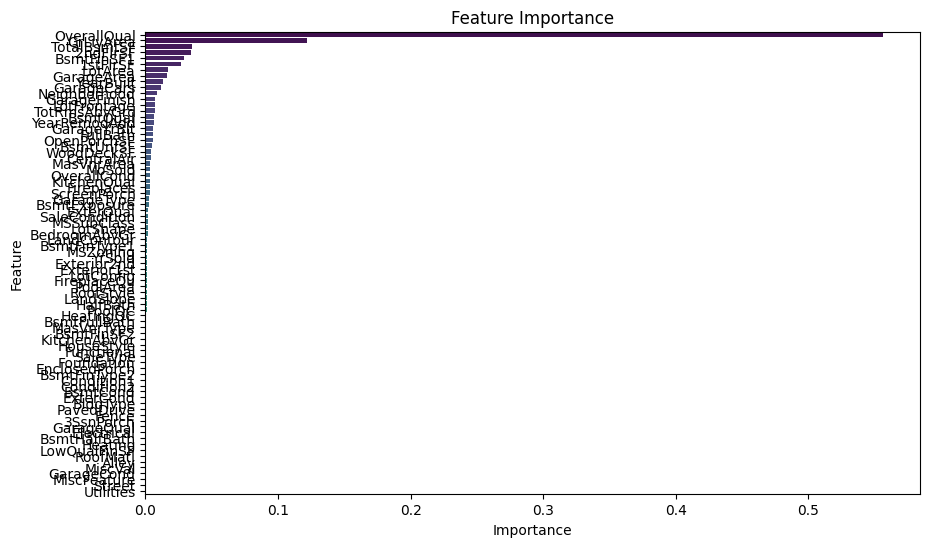

In [34]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

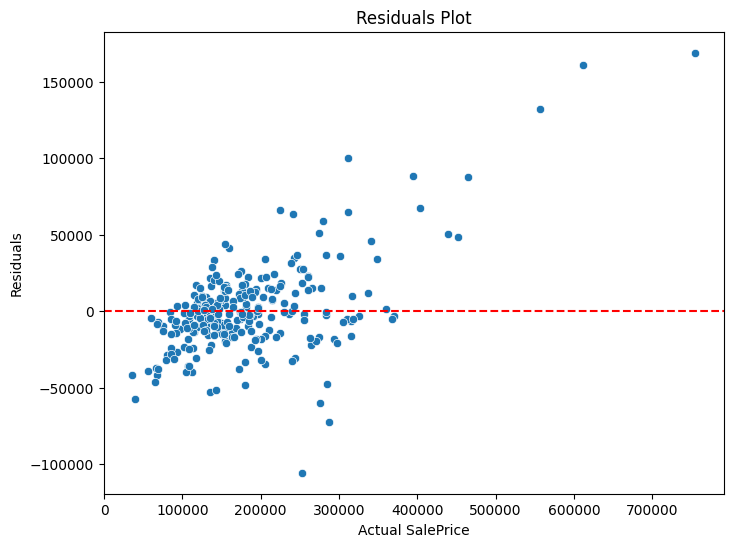

In [30]:
# Calculate residuals
residuals = y_valid - y_pred

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_valid, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Actual SalePrice')
plt.ylabel('Residuals')
plt.show()

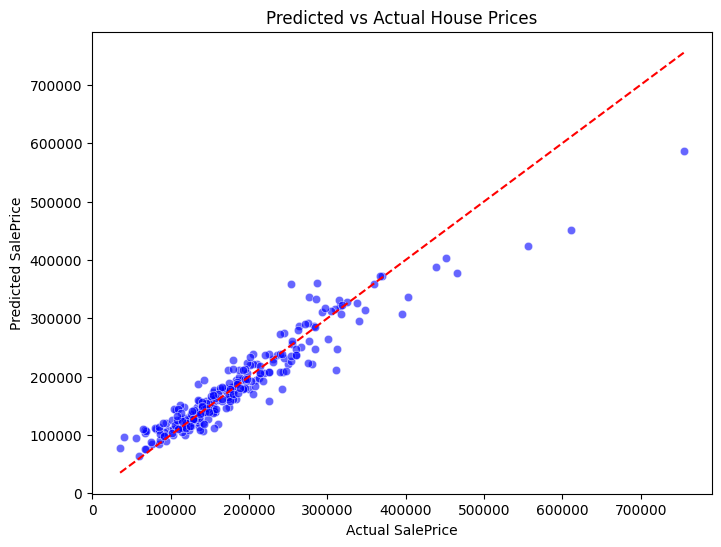

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_valid, y=y_pred, color='blue', alpha=0.6)
plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'r--')
plt.title('Predicted vs Actual House Prices')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.show()

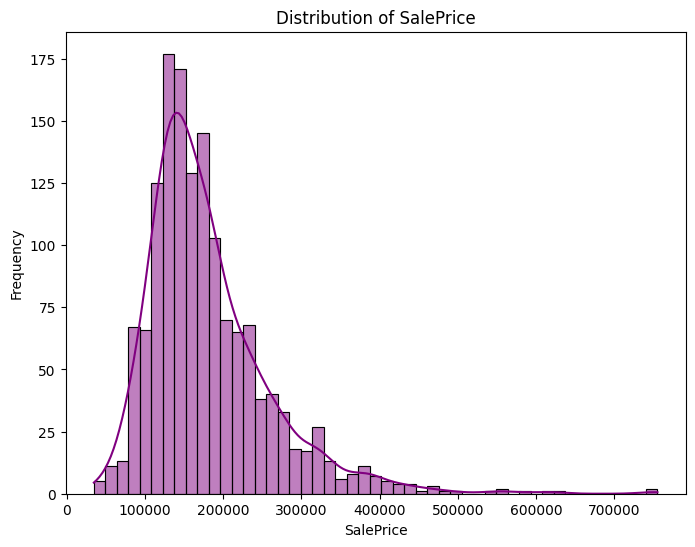

In [32]:
# Distribution of SalePrice
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color='purple')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

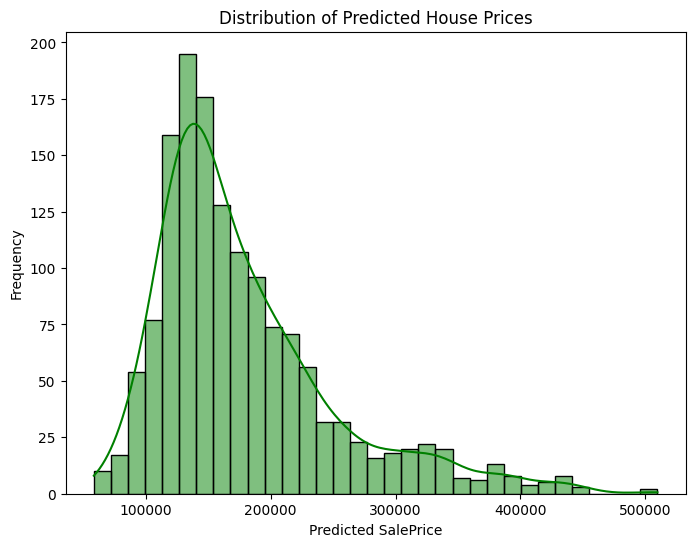

In [ ]:
# Prediction Distribution
plt.figure(figsize=(8, 6))
sns.histplot(test_predictions, kde=True, color='green')
plt.title('Distribution of Predicted House Prices')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Frequency')
plt.show()